[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [2]:
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

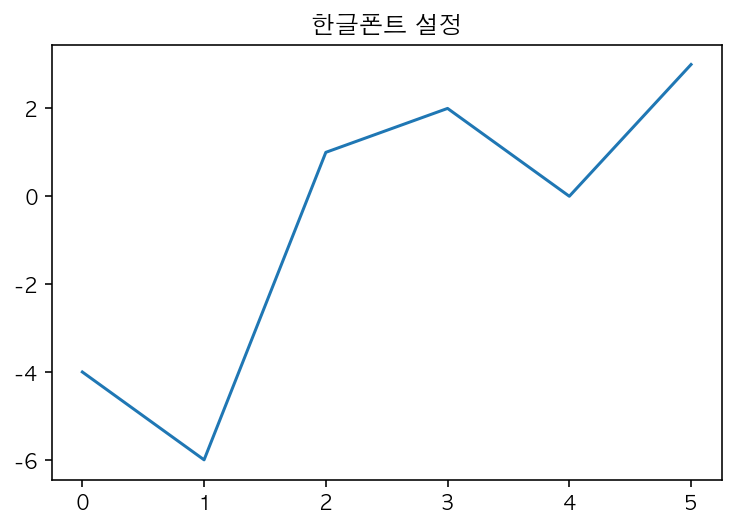

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title('한글폰트 설정')
plt.plot([-4, -6, 1, 2, 0, 3])

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [5]:
# 파일을 불러와 df 라는 변수에 담습니다.

df = pd.read_csv('data/상가업소정보_201912_01.csv', sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [6]:
### 데이터 크기 보기
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(573680, 39)

### info 보기

In [7]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
지점명          76674 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
표준산업분류코드     539290 non-null object
표준산업분류명      539290 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null int64
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번부번지        474924 non-null float64
지번주소         573680 non-null obje

### 결측치 보기

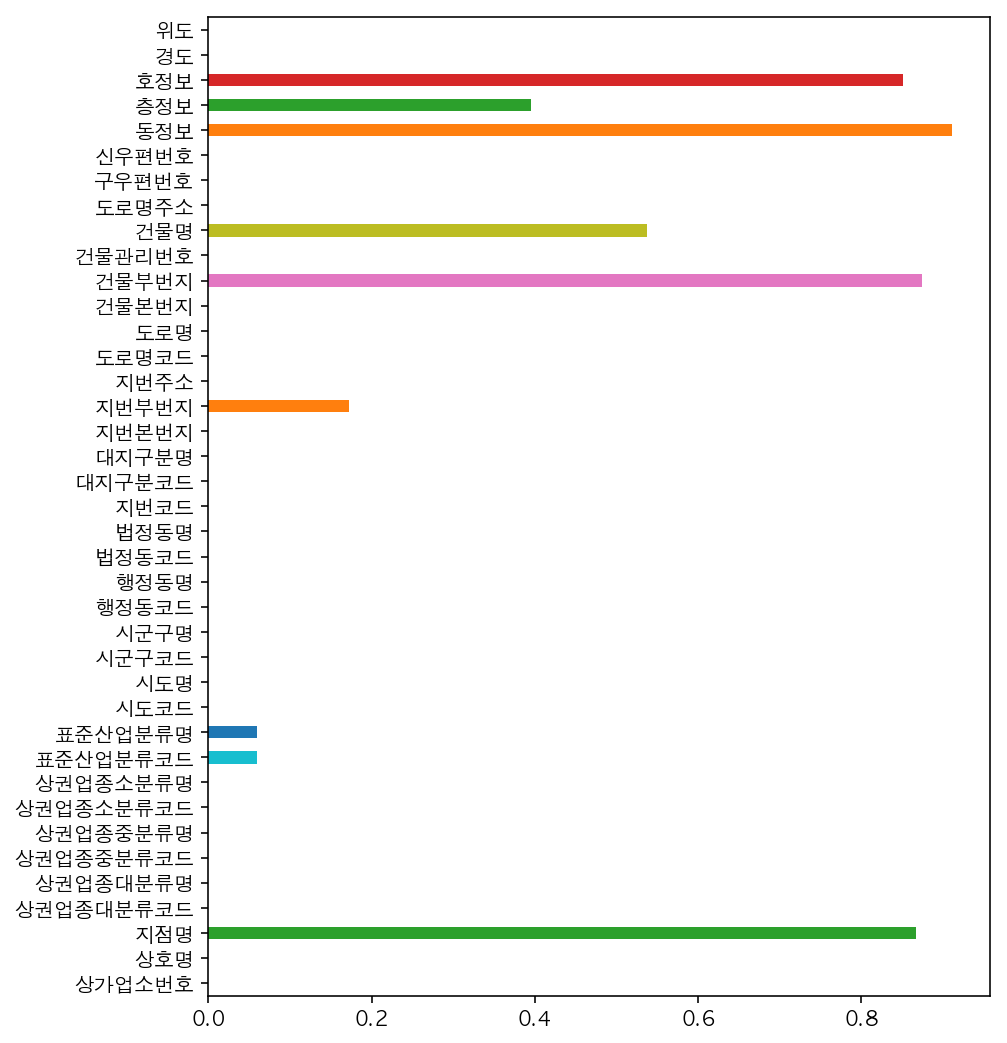

In [8]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df.isnull().mean().plot.barh(figsize=(7,9))

### 사용하지 않는 컬럼 제거하기

In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']

print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [10]:
# 제거 후 메모리 사용량 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
상호명         573679 non-null object
상권업종대분류명    573680 non-null object
상권업종중분류명    573680 non-null object
상권업종소분류명    573680 non-null object
시도명         573680 non-null object
시군구명        573680 non-null object
행정동명        573680 non-null object
법정동명        573680 non-null object
도로명주소       573680 non-null object
경도          573680 non-null float64
위도          573680 non-null float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [11]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

df_seoul = df[df['시도명'] == '서울특별시'].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [12]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [16]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.

df_seoul['시군구명'].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [17]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.

df_seoul.to_csv('seoul_open_store.csv', index=False)

In [19]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.

pd.read_csv('seoul_open_store.csv')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
5,석봉토스트,음식,패스트푸드,토스트전문,서울특별시,광진구,구의2동,구의동,서울특별시 광진구 자양로39길 20,127.088387,37.549245
6,허술한집,음식,분식,라면김밥분식,서울특별시,강서구,공항동,공항동,서울특별시 강서구 공항대로3길 9,126.809957,37.562013
7,피자마루,음식,패스트푸드,피자전문,서울특별시,중구,약수동,신당동,서울특별시 중구 동호로7길 37,127.010861,37.552153
8,홍능갈비,음식,한식,갈비/삼겹살,서울특별시,강서구,화곡1동,화곡동,서울특별시 강서구 화곡로18길 31,126.836078,37.538927
9,커피빈,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 서초중앙로 118,127.014217,37.492388


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [20]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul["상호명_소문자"] = df_seoul['상호명'].str.lower()

In [25]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins'), '상호명_소문자'].shape

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


(466,)

In [26]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자'].shape

(191,)

In [28]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.

df_31 = df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [29]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.

df_31.loc[df_31['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명'] = '배스킨라빈스'

df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [31]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')

df_31['브랜드명']

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
2342       던킨도너츠
3007       던킨도너츠
11060     배스킨라빈스
13042      던킨도너츠
13925      던킨도너츠
13953     배스킨라빈스
14188      던킨도너츠
14201     배스킨라빈스
14242     배스킨라빈스
14295      던킨도너츠
14411     배스킨라빈스
15443      던킨도너츠
15512     배스킨라빈스
15701      던킨도너츠
15730     배스킨라빈스
15940     배스킨라빈스
24841     배스킨라빈스
25981     배스킨라빈스
36998     배스킨라빈스
37080     배스킨라빈스
39819      던킨도너츠
43418     배스킨라빈스
45155     배스킨라빈스
45929      던킨도너츠
45990     배스킨라빈스
           ...  
514089     던킨도너츠
516001     던킨도너츠
516954    배스킨라빈스
517529    배스킨라빈스
518109    배스킨라빈스
518731     던킨도너츠
520329    배스킨라빈스
520387    배스킨라빈스
525618    배스킨라빈스
526208     던킨도너츠
534207    배스킨라빈스
535247     던킨도너츠
535726    배스킨라빈스
536006    배스킨라빈스
536289    배스킨라빈스
537934    배스킨라빈스
547306    배스킨라빈스
553907     던킨도너츠
554211     던킨도너츠
554896    배스킨라빈스
555145    배스킨라빈스
556592    배스킨라빈스
557464    배스킨라빈스
557822    배스킨라빈스
558006    배스킨라빈스
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라

In [32]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31['상권업종대분류명'].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [33]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31['상권업종대분류명'].isin(['소매', '생활서비스'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [35]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.

df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매', '생활서비스'])].copy()
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로,던킨도너츠
2342,던킨도너츠용산민자역사2호,음식,패스트푸드,도너츠전문,서울특별시,용산구,한강로동,한강로3가,서울특별시 용산구 한강대로21나길 7,126.963223,37.527903,던킨도너츠용산민자역사2호,던킨도너츠
3007,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,송파구,잠실본동,잠실동,서울특별시 송파구 석촌호수로 118,127.090005,37.507431,던킨도너츠,던킨도너츠
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,베스킨라빈스은행나무점,배스킨라빈스
13042,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성북구,안암동,안암동5가,서울특별시 성북구 인촌로24길 6,127.029198,37.585960,던킨도너츠,던킨도너츠
13925,던킨도너츠교대점,음식,패스트푸드,도너츠전문,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 서초중앙로 105,127.013839,37.491015,던킨도너츠교대점,던킨도너츠


### 범주형 값으로 countplot 그리기

In [42]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.

brand_count = df_31['브랜드명'].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

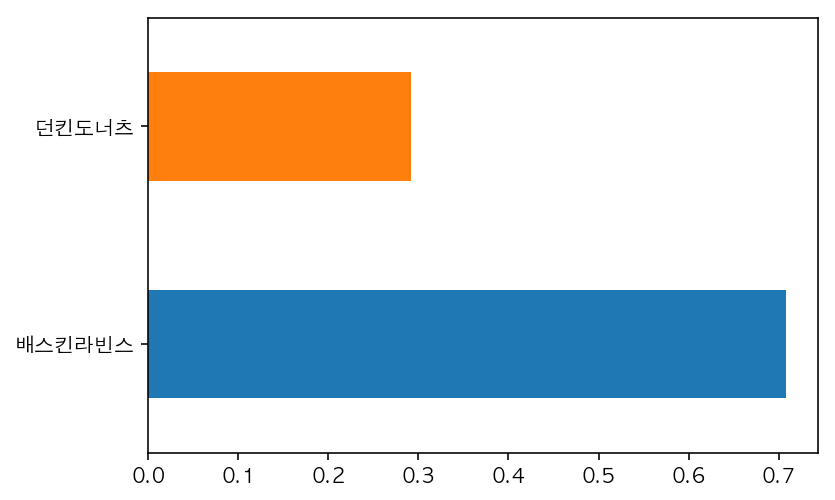

In [40]:
# normalize=True 로 빈도수의 비율을 구합니다.

df_31['브랜드명'].value_counts(normalize=True).plot.barh()

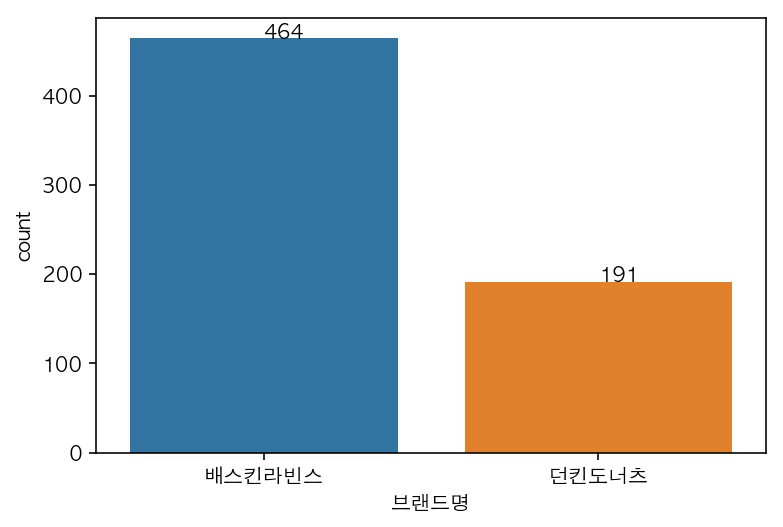

In [45]:
# countplot 을 그립니다.

g = sns.countplot(data=df_31, x='브랜드명')

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

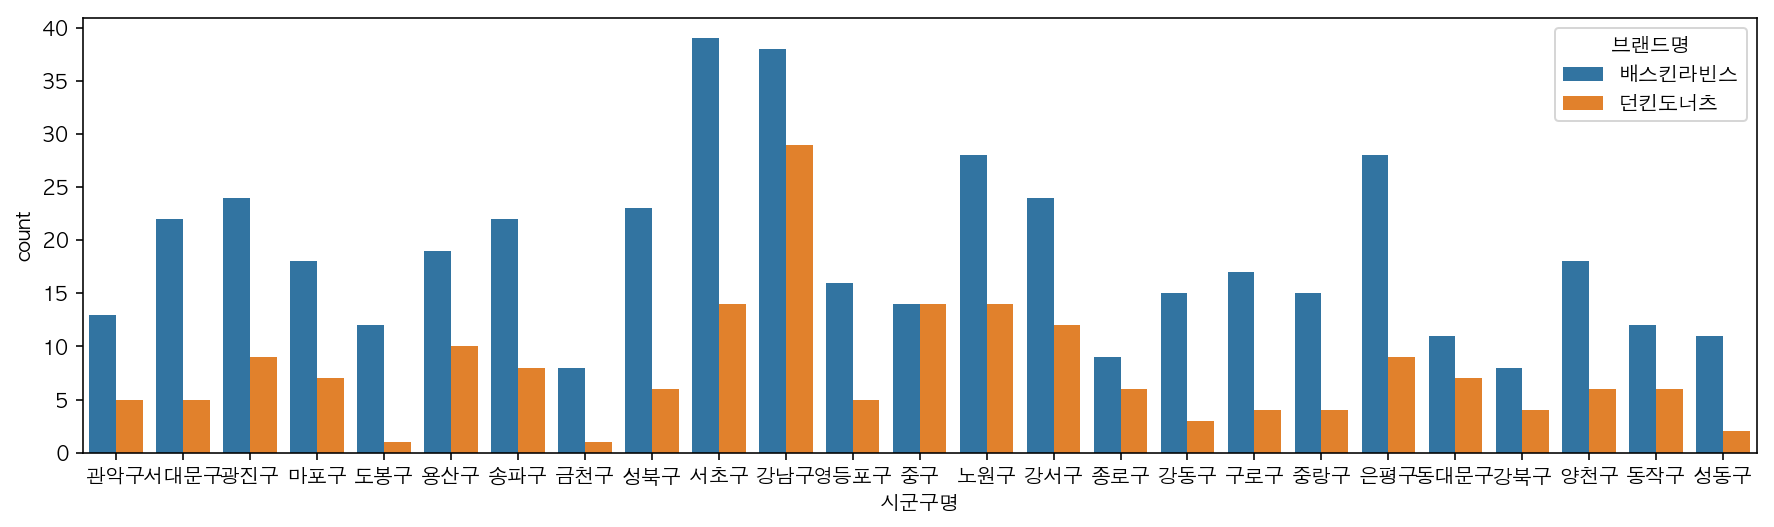

In [47]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

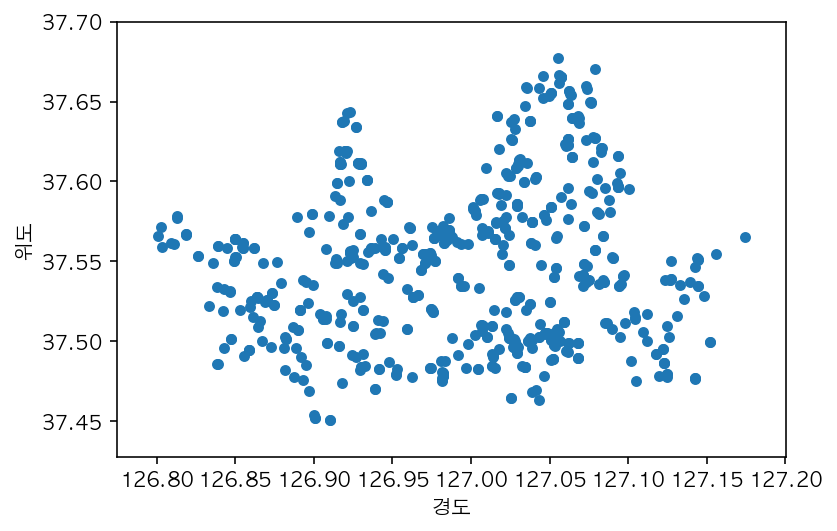

In [48]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.

df_31[['위도', '경도']].plot.scatter(x='경도', y='위도')

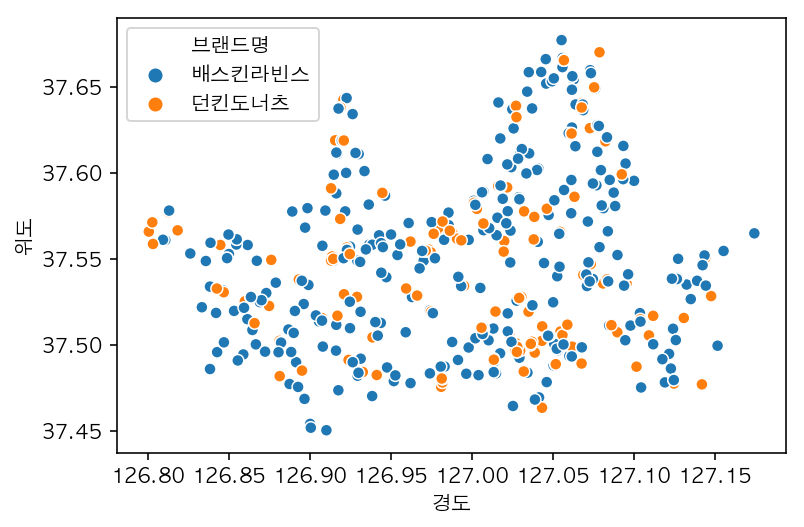

In [49]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

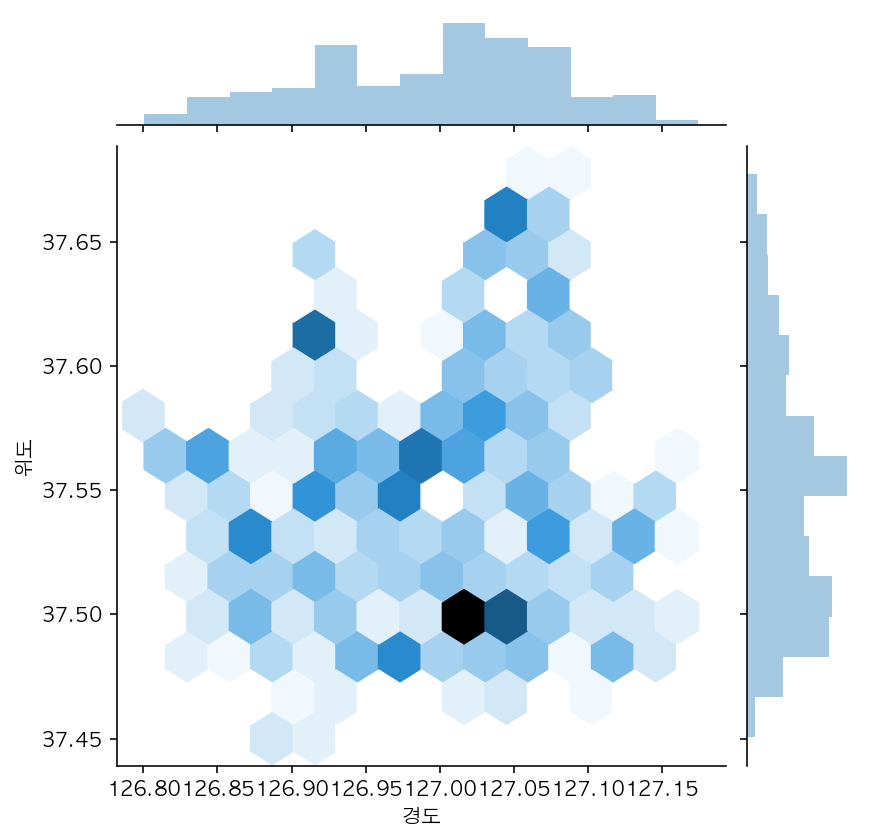

In [51]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.

sns.jointplot(data=df_31, x='경도', y='위도', kind='hex')

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [52]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [53]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

lat = df_31['위도'].mean()
long = df_31['경도'].mean()

In [55]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat, long])
m

In [57]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

folium.Marker([37.495593, 127.039032], popup='<i>던킨도너츠</i>', tooltip='던킨도너츠').add_to(m)

m

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [58]:
# 데이터프레임의 인덱스만 출력합니다.

df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

### 기본 마커로 표현하기

In [70]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명'] + '-' +  df_31.loc[i, '도로명주소']
    
    icon_color = 'blue'
    if df_31.loc[i, '브랜드명'] == '던킨도너츠':
        icon_color = 'red'
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup='<i>{}</i>'.format(title), 
        tooltip=title
    ).add_to(m)
    
m